In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
np.random.seed(22)
random.seed(22)

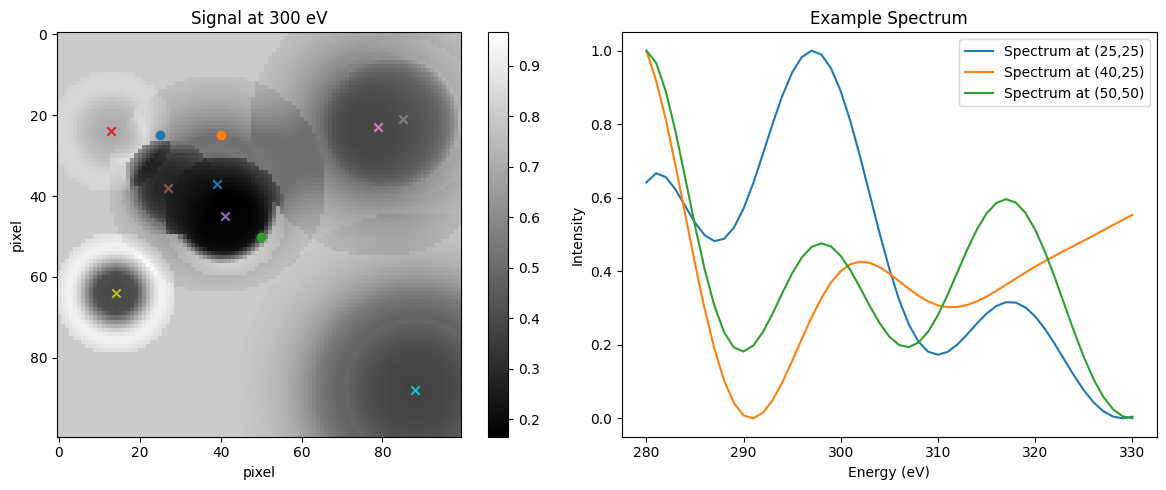

In [9]:
# --- Parameters ---
grid_size = 100
energy_axis = np.arange(280, 331)  # 1 eV resolution
num_channels = len(energy_axis)

# --- Simulated Spectra ---
def make_sine_spectrum(freq, phase, decay=0.03):
    return np.sin(freq * (energy_axis - 280) * np.pi / 25 + phase) * np.exp(-decay * (energy_axis - 280)) + 1

ref_spectra = {
    "amorphous": make_sine_spectrum(0.5, 0),
    "graphite": make_sine_spectrum(1.0, 0.5),
    "diamond": make_sine_spectrum(1.5, 1.0),
    "nanotube": make_sine_spectrum(2.0, 1.5),
    "fullerene": make_sine_spectrum(2.5, 2.0),
}

# Normalize spectra
for key in ref_spectra:
    s = ref_spectra[key]
    ref_spectra[key] = (s - s.min()) / (s.max() - s.min())

# --- Initialize Cube ---
spectra_cube = np.zeros((grid_size, grid_size, num_channels))
for i in range(grid_size):
    for j in range(grid_size):
        spectra_cube[i, j] = ref_spectra["amorphous"]

# --- Add Phase Blobs ---
def add_gaussian_blob(center, radius, phase, intensity=1.0):
    for i in range(grid_size):
        for j in range(grid_size):
            dist = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            if dist < radius:
                weight = np.exp(-dist**2 / (2 * (radius/2)**2)) * intensity
                spectra_cube[i, j] += weight * (ref_spectra[phase] - ref_spectra["amorphous"])

phases = ["graphite", "diamond", "nanotube", "fullerene"]
cents= [(24, 13), (45, 41), (38, 27), (23, 79), (21, 85), (64, 14), (88, 88), (37, 39)]
for (cx,cy),r,p in zip(cents,
                       [15, 15, 12, 32, 20, 15, 44, 27],
                       ["graphite", "diamond", "nanotube", "fullerene"]*2):
    #cx, cy = random.randint(10, 90), random.randint(10, 90)
    #r = int(random.randint(5, 15) * 2.1)  # 2.5x blob size
    #p = random.choice(phases)
    add_gaussian_blob((cx, cy), r, p)

# --- Final Normalization ---
# Normalize each spectrum to its own min and max
min_vals = np.min(spectra_cube, axis=2, keepdims=True)
max_vals = np.max(spectra_cube, axis=2, keepdims=True)
spectra_cube = (spectra_cube - min_vals) / (max_vals - min_vals)


# --- Visualization ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(25,25)
plt.scatter(40,25)
plt.scatter(50,50)

im=plt.imshow(spectra_cube[:, :, 2:20+5].mean(axis=-1), cmap='gray')
for (cx,cy) in cents:
  plt.scatter( cy,cx,marker="x" )
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title(f"Signal at {energy_axis[20]} eV")
plt.colorbar(im)

plt.subplot(1, 2, 2)
plt.plot(energy_axis, spectra_cube[25, 25], label='Spectrum at (25,25)')
plt.plot(energy_axis, spectra_cube[40, 25], label='Spectrum at (40,25)')
plt.plot(energy_axis, spectra_cube[50, 50], label='Spectrum at (50,50)')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity")
plt.title("Example Spectrum")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
spec_carbon=spectra_cube

In [11]:
np.random.seed(44)
random.seed(44)

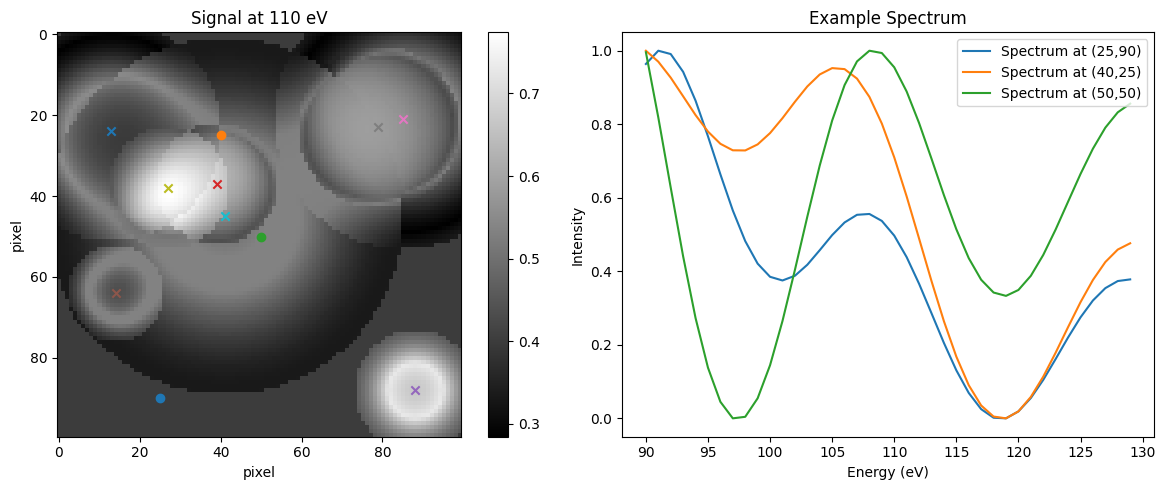

In [12]:
# --- Parameters ---
grid_size = 100
energy_axis = np.arange(90, 130)  # 1 eV resolution
num_channels = len(energy_axis)

# --- Simulated Spectra ---
def make_sine_spectrum(freq, phase, decay=0.03):
    return np.sin(freq * (energy_axis - 280) * np.pi / 25 + phase) * np.exp(-decay * (energy_axis - 280)) + 1

ref_spectra = {
    "Si_1": make_sine_spectrum(0.33, 0),
    "Si_2": make_sine_spectrum(1.33, 0.5),
    "Si_3": make_sine_spectrum(1.66, 1.0),
    "Si_4": make_sine_spectrum(2.33, 1.5),
    "Si_5": make_sine_spectrum(2.66, 2.0),
}

# Normalize spectra
for key in ref_spectra:
    s = ref_spectra[key]
    ref_spectra[key] = (s - s.min()) / (s.max() - s.min())

# --- Initialize Cube ---
spectra_cube = np.zeros((grid_size, grid_size, num_channels))
for i in range(grid_size):
    for j in range(grid_size):
        spectra_cube[i, j] = ref_spectra["Si_1"]

# --- Add Phase Blobs ---
def add_gaussian_blob(center, radius, phase, intensity=1.0):
    for i in range(grid_size):
        for j in range(grid_size):
            dist = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            if dist < radius:
                weight = np.exp(-dist**2 / (2 * (radius/2)**2)) * intensity
                spectra_cube[i, j] += weight * (ref_spectra[phase] - ref_spectra["Si_1"])

phases = ["Si_2", "Si_3", "Si_4", "Si_5"]
cents= [(24, 13), (45, 41), (38, 27), (23, 79), (21, 85), (64, 14), (88, 88), (37, 39)][::-1]
for (cx,cy),r,p in zip(cents,
                       [15, 15, 12, 32, 20, 15, 44, 27],
                       ["Si_2", "Si_3", "Si_4", "Si_5"]*2):
    #cx, cy = random.randint(10, 90), random.randint(10, 90)
    #r = int(random.randint(5, 15) * 2.1)  # 2.5x blob size
    #p = random.choice(phases)
    add_gaussian_blob((cx, cy), r, p)

# --- Final Normalization ---
# Normalize each spectrum to its own min and max
min_vals = np.min(spectra_cube, axis=2, keepdims=True)
max_vals = np.max(spectra_cube, axis=2, keepdims=True)
spectra_cube = (spectra_cube - min_vals) / (max_vals - min_vals)


# --- Visualization ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(25,90)
plt.scatter(40,25)
plt.scatter(50,50)

im=plt.imshow(spectra_cube[:, :, 2:20+5].mean(axis=-1), cmap='gray')
for (cx,cy) in cents:
  plt.scatter( cy,cx,marker="x" )
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title(f"Signal at {energy_axis[20]} eV")
plt.colorbar(im)

plt.subplot(1, 2, 2)
plt.plot(energy_axis, spectra_cube[25, 90], label='Spectrum at (25,90)')
plt.plot(energy_axis, spectra_cube[40, 25], label='Spectrum at (40,25)')
plt.plot(energy_axis, spectra_cube[50, 50], label='Spectrum at (50,50)')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity")
plt.title("Example Spectrum")
plt.legend()

plt.tight_layout()
plt.show()
spec_silicon=spectra_cube

In [14]:
np.savez("specs",spec_silicon,spec_carbon)